In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = 'data'

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1500 files belonging to 4 classes.


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [5]:
batch_size = 32
image_size = (128, 128)

In [6]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

# Load data using flow_from_directory for validation
valid_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1202 images belonging to 4 classes.
Found 298 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 neurons for four classes
])

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
38/38 [==============================] - 32s 796ms/step - loss: 1.3589 - accuracy: 0.5108 - val_loss: 0.8336 - val_accuracy: 0.6812
Epoch 2/10
38/38 [==============================] - 30s 786ms/step - loss: 0.6849 - accuracy: 0.7454 - val_loss: 0.6978 - val_accuracy: 0.7517
Epoch 3/10
38/38 [==============================] - 30s 778ms/step - loss: 0.4001 - accuracy: 0.8602 - val_loss: 0.5849 - val_accuracy: 0.7852
Epoch 4/10
38/38 [==============================] - 30s 801ms/step - loss: 0.2807 - accuracy: 0.9110 - val_loss: 0.5161 - val_accuracy: 0.8322
Epoch 5/10
38/38 [==============================] - 30s 783ms/step - loss: 0.1551 - accuracy: 0.9642 - val_loss: 0.6508 - val_accuracy: 0.8221
Epoch 6/10
38/38 [==============================] - 30s 786ms/step - loss: 0.1471 - accuracy: 0.9626 - val_loss: 0.5320 - val_accuracy: 0.8758
Epoch 7/10
38/38 [==============================] - 30s 799ms/step - loss: 0.0726 - accuracy: 0.9759 - val_loss: 0.4668 - val_accuracy: 0.8893

In [10]:
model.save("classifierModel.h5")

c:\Users\khize\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from keras.models import load_model
loadedModel = load_model("classifierModel.h5")

1/1 [==============================] - 0s 38ms/step


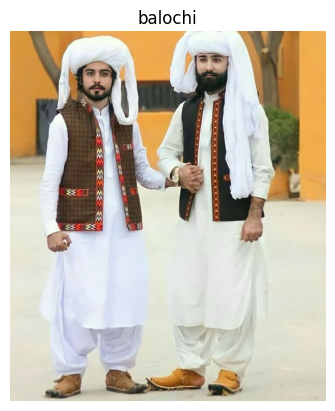

In [21]:
import matplotlib.image as mpimg
test_image_path = 'test/Balocch.jpg'  # Change the path to your test image
test_image = tf.keras.utils.load_img(test_image_path, target_size=(128, 128))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = test_image.reshape(1, 128, 128, 3)
predictions = loadedModel.predict(test_image) #model.predict()

# Display the test image and prediction result
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')
class_labels = ['ajrak', 'balochi','kalash', 'shalwarKameez']
predicted_class = class_labels[np.argmax(predictions)]
plt.title(predicted_class)
plt.show()